In [11]:
import pandas as pd
import os
from datetime import datetime, timedelta
import pytz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
archivos = os.listdir('data/desagregada/')

In [13]:
def tiempo_desde_ultimo_reporte(dt):
    consulta = pd.to_datetime(dt.timestamp_consulta.iloc[0]).replace(tzinfo=None)
    dt['ult_reporte'] = dt.last_reported.map(datetime.fromtimestamp)
    dt['delta_ultimo_reporte'] = ((consulta - dt.ult_reporte)  / np.timedelta64(1, 'm')).astype(int)
    return dt

In [14]:
concatenada = pd.concat([tiempo_desde_ultimo_reporte(pd.read_csv('data/desagregada/'+archivo)) for archivo in archivos])
concatenada = concatenada.drop('Unnamed: 0',axis=1)

In [15]:
concatenada.head()

,is_charging_station,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_available_types,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,status,name,capacity,lat,lon,timestamp_consulta,ult_reporte,delta_ultimo_reporte
0,False,1,1,1,1563570004,2,"{'mechanical': 2, 'ebike': 0}",0,18,0,2,IN_SERVICE,002 - Retiro I,20,-34.592423,-58.374715,2019-07-19 18:02:20.449265-03:00,2019-07-19 18:00:04,2
1,False,1,1,1,1563569978,0,"{'mechanical': 0, 'ebike': 0}",0,20,0,3,IN_SERVICE,003 - ADUANA,20,-34.611032,-58.368260,2019-07-19 18:02:20.449265-03:00,2019-07-19 17:59:38,2
2,False,1,1,1,1563569972,0,"{'mechanical': 0, 'ebike': 0}",0,20,0,4,IN_SERVICE,004 - Plaza Roma,20,-34.601726,-58.368763,2019-07-19 18:02:20.449265-03:00,2019-07-19 17:59:32,2
3,False,1,1,1,1563569870,1,"{'mechanical': 1, 'ebike': 0}",2,39,1,5,IN_SERVICE,005 - Plaza Italia,42,-34.580550,-58.420954,2019-07-19 18:02:20.449265-03:00,2019-07-19 17:57:50,4
4,False,1,1,1,1563569866,0,"{'mechanical': 0, 'ebike': 0}",2,18,0,6,IN_SERVICE,006 - Parque Lezama,20,-34.628526,-58.369758,2019-07-19 18:02:20.449265-03:00,2019-07-19 17:57:46,4


In [16]:
concatenada.to_csv('data/un_dia_ecobici.csv',index=False)

In [17]:
concatenada['sospechosa'] = False
concatenada.loc[(concatenada.is_returning ==1) & (concatenada.delta_ultimo_reporte > 10),'sospechosa'] = True  


In [23]:
col_interes = ['timestamp_consulta','num_bikes_available','num_bikes_disabled','num_docks_available','num_docks_disabled','sospechosa']

In [25]:
agregada = concatenada.reindex(columns = col_interes).groupby('timestamp_consulta').sum()
agregada.head()

,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,sospechosa
timestamp_consulta,,,,,
2019-07-19 00:31:02.847471-03:00,1296,1066,5164,91,1.0
2019-07-19 01:01:04.187908-03:00,1288,1072,5166,86,1.0
2019-07-19 01:31:09.091072-03:00,1356,1051,5120,88,1.0
2019-07-19 02:01:12.404074-03:00,1391,1039,5098,90,1.0
2019-07-19 02:31:14.098947-03:00,1435,1023,5070,88,2.0


In [28]:
agregada['max_bicis_sistema']=agregada.num_bikes_available.max()

In [29]:
agregada.to_csv('un_dia_ecobici_agregada.csv')

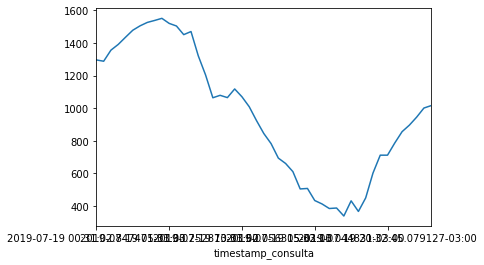

In [27]:
agregada.num_bikes_available.plot()